In [1]:

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image
import glob
import random
import torch
from torch.utils.data import Dataset, DataLoader, random_split
from torchvision.transforms import ToTensor, Resize
import torch.nn as nn
import torch.nn.parallel
import torch.nn.functional as F
import torch.backends.cudnn as cudnn
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms

In [2]:
def image_loader(path):
    img =  cv2.imread(path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = img.reshape(3,331,331)
    return img

In [3]:
# mapping labels to 0 to 3 for all the four classes
labmap = {0: "n02089078-black-and-tan_coonhound"
          ,1: "n02091831-Saluki"
          ,2:"n02092002-Scottish_deerhound"
          ,3:"n02095314-wire-haired_fox_terrier"} 

BATCH_SIZE = 16

data_set = dset.ImageFolder(root="../DataSet/ProcessedDatasets/",loader = image_loader) # should we add any transforms or split in



torch.Size([3, 331, 331])
<class 'torch.Tensor'>


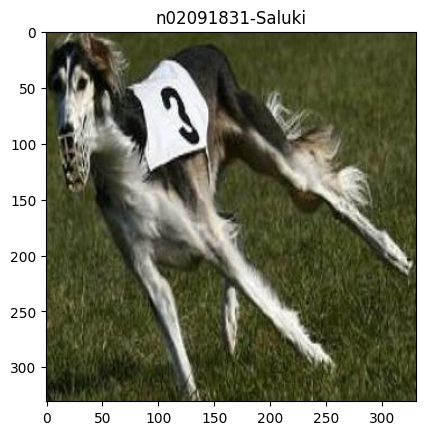

In [4]:
# for testing the data loader
Train_Loader =  DataLoader(dataset=data_set,shuffle=True,batch_size=BATCH_SIZE)

for img,label in Train_Loader:
    print(img[0].shape)
    plt.imshow(img[0].reshape(331,331,3))
    plt.title(labmap[int(label[0])])
    print(type(img[0]))
    break

In [5]:
class CNN(nn.Module):
    def __init__(self) -> None:
        super(CNN, self).__init__()
        self.Layer1 = nn.Conv2d(3,8,kernel_size=(3,3),bias=True) # what about bias?
        self.max_pool = nn.MaxPool2d(kernel_size=(2,2))
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(8*164*164,16) # Should it be a linear layer?
        self.fc = nn.Linear(16,4)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.Layer1(x.float())
        x = self.relu(x) # should be after max_pool or before?
        x = self.max_pool(x)
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.fc(x)
        return nn.functional.softmax(x)

In [6]:
class CNN5(nn.Module):
    def __init__(self) -> None:
        super(CNN5, self).__init__()
        self.Layer1 = nn.Conv2d(3,8,kernel_size=(5,5),bias=True) # what about bias?
        self.max_pool = nn.MaxPool2d(kernel_size=(2,2))
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(8*80*80,16) # Should it be a linear layer?
        self.fc = nn.Linear(16,4)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.Layer1(x.float())
        x = self.relu(x) # should be after max_pool or before?
        x = self.max_pool(x)
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.fc(x)
        return nn.functional.softmax(x)

In [7]:
class CNN7(nn.Module):
    def __init__(self) -> None:
        super(CNN7, self).__init__()
        self.Layer1 = nn.Conv2d(3,8,kernel_size=(7,7),bias=True) # what about bias?
        self.max_pool = nn.MaxPool2d(kernel_size=(2,2))
        self.flatten = nn.Flatten()
        self.hidden = nn.Linear(8*37*37,16) # Should it be a linear layer?
        self.fc = nn.Linear(16,4)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.Layer1(x.float())
        x = self.relu(x) # should be after max_pool or before?
        x = self.max_pool(x)
        x = self.flatten(x)
        x = self.hidden(x)
        x = self.relu(x)
        x = self.fc(x)
        return nn.functional.softmax(x)

C:\Users\kaasa\AppData\Local\Temp\ipykernel_3360\3590348269.py:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return nn.functional.softmax(x)


Epoch 1/10, Training Loss: 1.5437, Training Accuracy: 30.72%, Validation Loss: 1.4299, Validation Accuracy: 32.21%
Epoch 2/10, Training Loss: 1.1437, Training Accuracy: 30.72%, Validation Loss: 1.4024, Validation Accuracy: 32.21%
Epoch 3/10, Training Loss: 1.3437, Training Accuracy: 30.72%, Validation Loss: 1.4162, Validation Accuracy: 32.21%
Epoch 4/10, Training Loss: 1.3437, Training Accuracy: 30.72%, Validation Loss: 1.4162, Validation Accuracy: 32.21%
Epoch 5/10, Training Loss: 1.5437, Training Accuracy: 30.72%, Validation Loss: 1.4299, Validation Accuracy: 32.21%
Epoch 6/10, Training Loss: 1.5437, Training Accuracy: 30.72%, Validation Loss: 1.4299, Validation Accuracy: 32.21%
Epoch 7/10, Training Loss: 1.3437, Training Accuracy: 30.72%, Validation Loss: 1.4162, Validation Accuracy: 32.21%
Epoch 8/10, Training Loss: 1.5437, Training Accuracy: 30.72%, Validation Loss: 1.4299, Validation Accuracy: 32.21%
Epoch 9/10, Training Loss: 1.3437, Training Accuracy: 30.72%, Validation Loss: 1

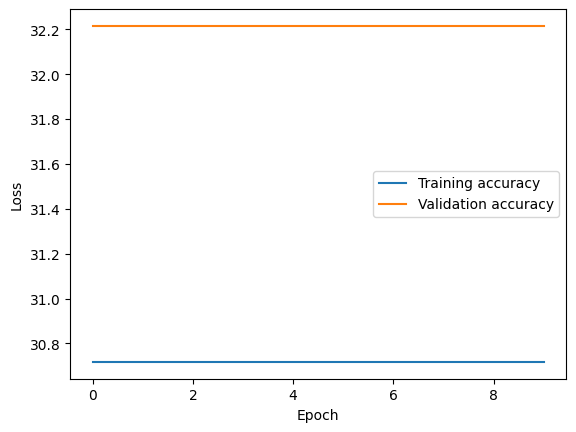

In [8]:
train_data,val_data = random_split(data_set, [0.8, 0.2])

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)



device = 'cuda' 
model = CNN().to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-20)
num_epochs = 10
training_losses = []
training_accuracies = []
validation_losses = []
validation_accuracies = []
for epoch in range(num_epochs):
    model.train()
    train_correct = 0
    train_total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()  # Clear gradients
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    training_losses.append(loss.item())
    training_accuracies.append(100 * train_correct / train_total)

    # Validation loop
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    validation_losses.append(val_loss / len(val_loader))
    validation_accuracies.append(100 * val_correct / val_total)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item():.4f}, Training Accuracy: {100 * train_correct / train_total:.2f}%, Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {100 * val_correct / val_total:.2f}%')
plt.plot(training_accuracies, label='Training accuracy')
plt.plot(validation_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
train_data,val_data = random_split(data_set, [0.8, 0.2])

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)



device = 'cuda' 
model = CNN5().to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-20)
num_epochs = 10
training_losses = []
training_accuracies = []
validation_losses = []
validation_accuracies = []
for epoch in range(num_epochs):
    model.train()
    train_correct = 0
    train_total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()  # Clear gradients
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    training_losses.append(loss.item())
    training_accuracies.append(100 * train_correct / train_total)

    # Validation loop
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    validation_losses.append(val_loss / len(val_loader))
    validation_accuracies.append(100 * val_correct / val_total)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item():.4f}, Training Accuracy: {100 * train_correct / train_total:.2f}%, Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {100 * val_correct / val_total:.2f}%')
plt.plot(training_accuracies, label='Training accuracy')
plt.plot(validation_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

RuntimeError: mat1 and mat2 shapes cannot be multiplied (16x212552 and 51200x16)

In [ ]:
train_data,val_data = random_split(data_set, [0.8, 0.2])

train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)



device = 'cuda' 
model = CNN7().to(device)

optimizer = optim.Adam(model.parameters(), lr=1e-20)
num_epochs = 10
training_losses = []
training_accuracies = []
validation_losses = []
validation_accuracies = []
for epoch in range(num_epochs):
    model.train()
    train_correct = 0
    train_total = 0
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()  # Clear gradients
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
        _, predicted = torch.max(outputs.data, 1)
        train_total += labels.size(0)
        train_correct += (predicted == labels).sum().item()

    training_losses.append(loss.item())
    training_accuracies.append(100 * train_correct / train_total)

    # Validation loop
    model.eval()
    val_loss = 0.0
    val_correct = 0
    val_total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    validation_losses.append(val_loss / len(val_loader))
    validation_accuracies.append(100 * val_correct / val_total)

    print(f'Epoch {epoch + 1}/{num_epochs}, Training Loss: {loss.item():.4f}, Training Accuracy: {100 * train_correct / train_total:.2f}%, Validation Loss: {val_loss / len(val_loader):.4f}, Validation Accuracy: {100 * val_correct / val_total:.2f}%')


plt.plot(training_accuracies, label='Training accuracy')
plt.plot(validation_accuracies, label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()